In [1]:
import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from google.colab.patches import cv2_imshow
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_dir = '/content/drive/MyDrive/VGG16Jeruk/train'
validation_dir = '/content/drive/MyDrive/VGG16Jeruk/validation'

train_data_Masak = os.listdir(train_dir + '/Masak/')
train_data_Mentah = os.listdir(train_dir + '/Mentah/')

class_name=sorted(os.listdir(train_dir))
class_name
class_name=sorted(os.listdir(validation_dir))
class_name


['Masak', 'Mentah']

In [7]:
# Augmentasi data training
train_datagen = ImageDataGenerator(
        rescale=1./255,  # normalisasi gambar
        rotation_range=20,  # rotasi gambar
        width_shift_range=0.2,  # pergeseran horizontal
        height_shift_range=0.2,  # pergeseran vertikal
        shear_range=0.2,  # shear transformation
        zoom_range=0.2,  # zoom gambar
        horizontal_flip=True,  # flipping horizontal
        fill_mode='nearest')  

# Normalisasi data testing
validation_datagen = ImageDataGenerator(rescale=1./255)

# Memuat data training dan testing
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data training
        target_size=(224, 224),  # ukuran gambar
        batch_size=32,  # ukuran batch
        class_mode='categorical')  # mode kelas

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # direktori data testing
        target_size=(224, 224),  # ukuran gambar
        batch_size=32,  # ukuran batch
        class_mode='categorical')  # mode kelas

Found 200 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [8]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [9]:
# Define the model architecture
model = Sequential()

In [10]:

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Konversi matriks fitur menjadi vektor
model.add(Flatten())

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='softmax'))




In [11]:
# Compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
# Tampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [13]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('vgg16_best.h5', monitor='accuracy', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="min",restore_best_weights=True, patience=5)

callbacks_list = [checkpoint,early]

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=10, 
    shuffle=True, 
    verbose=True,
    callbacks=callbacks_list)

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5000 
Epoch 1: accuracy improved from -inf to 0.50000, saving model to vgg16_best.h5
7/7 [==============================] - 124s 14s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 2: accuracy did not improve from 0.50000
7/7 [==============================] - 38s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 3: accuracy did not improve from 0.50000
7/7 [==============================] - 38s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 4: accuracy did not improve from 0.50000
7/7 [=======================

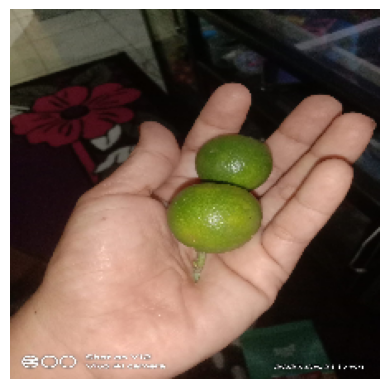

1/1 [==============================] - 0s 154ms/step
Hasil prediksi:  Jeruk Mentah


In [16]:
# Impor library yang dibutuhkan
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Muat model yang sudah dilatih
model = load_model('vgg16_best.h5')

# Definisikan target size untuk image input
target_size = (224, 224)

# Muat gambar yang akan diuji
image = load_img('test2.jpg', target_size=target_size)

# Konversi gambar menjadi array
image_array = img_to_array(image)

# Normalisasi array gambar
image_array = image_array.astype('float32')
plt.imshow(image_array/255.)
plt.axis('off')
plt.show()

# Reshape array gambar menjadi batch of size 1
image_array = np.expand_dims(image_array, axis=0)

# Prediksi label gambar menggunakan model
prediction = model.predict(image_array)

# Konversi hasil prediksi menjadi label kelas
if prediction < 0.5:
    label = 'Jeruk Masak'
else:
    label = 'Jeruk Mentah'

# Print hasil prediksi
print('Hasil prediksi: ', label)